In [1]:
import pandas as pd
import sklearn

Extracting Necessary Data

In [57]:
demo = pd.read_csv("DemoStats2023.csv")
demo_cols = demo.columns

# Strip the trailing white spaces in the variable
target_data =[]
for variable in demo_cols:
    variable = variable.strip()
    target_data.append(variable)

demo.columns = target_data
start = target_data.index("Total Recent Immigration")
end = target_data.index("Other Oceania And Other") + 1
target_data = target_data[start:end]

remove = ["Americas", "Central America", "Caribbean And Bermuda", "South America", "Europe", "Western Europe", "Eastern Europe", "Northern Europe", "Africa", "Western Africa", "Eastern Africa", "Northern Africa", "Asia", "West Central Asia And Middle East", "Eastern Asia", "Southeast Asia", "Southern Asia", "Oceania and Other"]

for item in remove:
    target_data.remove(item)

new_cols = ["Location", "Total Household Population"]
new_cols.extend(target_data)

demo = demo[new_cols].copy()
demo = demo.drop(16)
demo.to_csv("DemoByCountry.csv", index = False)

# Noting the number of immigrants as a proportion.
demo[target_data[1:]] = demo[target_data[1:]].apply(lambda x: x/x.sum(), axis=1)


,Location,Total Household Population,Total Recent Immigration,North America,Mexico,Other Central America,Cuba,Haiti,Jamaica,Other Caribbean And Bermuda,...,Viet Nam,Other Southeast Asia,Bangladesh,India,Nepal,Pakistan,Sri Lanka,Other Southern Asia,Australia,Other Oceania And Other
0,"Barrie, ON",242909,8191,0.046514,0.010255,0.008912,0.005860,0.002320,0.026370,0.027225,...,0.019045,0.019045,0.005128,0.083018,0.001465,0.036748,0.014894,0.000000,0.003663,0.001465
1,"Brantford, ON",151213,3467,0.051053,0.003173,0.004327,0.002019,0.000865,0.023363,0.020479,...,0.071820,0.005192,0.002019,0.309201,0.000000,0.024228,0.001154,0.000000,0.008076,0.000000
2,"Cobourg, ON",20384,220,0.027273,0.000000,0.009091,0.000000,0.000000,0.013636,0.000000,...,0.000000,0.004545,0.000000,0.245455,0.000000,0.000000,0.031818,0.000000,0.000000,0.000000
3,"Collingwood, ON",25749,679,0.039764,0.000000,0.004418,0.000000,0.000000,0.000000,0.008837,...,0.000000,0.004418,0.000000,0.045655,0.000000,0.004418,0.000000,0.000000,0.016200,0.008837
4,"Guelph, ON",174271,9382,0.029418,0.005543,0.007035,0.003731,0.000000,0.002665,0.004903,...,0.047964,0.020891,0.007781,0.194521,0.007568,0.032616,0.008740,0.002238,0.001705,0.000107
5,"Hamilton, ON",826271,40757,0.037662,0.007066,0.016856,0.006845,0.002159,0.020438,0.015776,...,0.012979,0.014133,0.008808,0.119685,0.001619,0.042275,0.005790,0.000417,0.001399,0.000981
6,"Kingston, ON",174527,3701,0.094029,0.017563,0.007025,0.004593,0.001351,0.010267,0.017563,...,0.021346,0.011348,0.008106,0.108349,0.000811,0.019184,0.013510,0.000000,0.001081,0.002972
7,"Kitchener - Cambridge - Waterloo, ON",613860,39700,0.030730,0.007506,0.016297,0.003350,0.000605,0.013300,0.010479,...,0.030050,0.019572,0.011134,0.167330,0.003149,0.038615,0.007960,0.000151,0.001234,0.000907
8,"London, ON",566609,29561,0.042049,0.009709,0.016711,0.003856,0.002605,0.013193,0.009066,...,0.015257,0.014343,0.006461,0.081797,0.008863,0.019248,0.002943,0.005649,0.002300,0.000744
9,"Oshawa, ON",453170,27388,0.034176,0.003688,0.007741,0.001716,0.002556,0.059369,0.036512,...,0.006499,0.007887,0.012487,0.164561,0.000110,0.064773,0.037498,0.000000,0.002775,0.001460


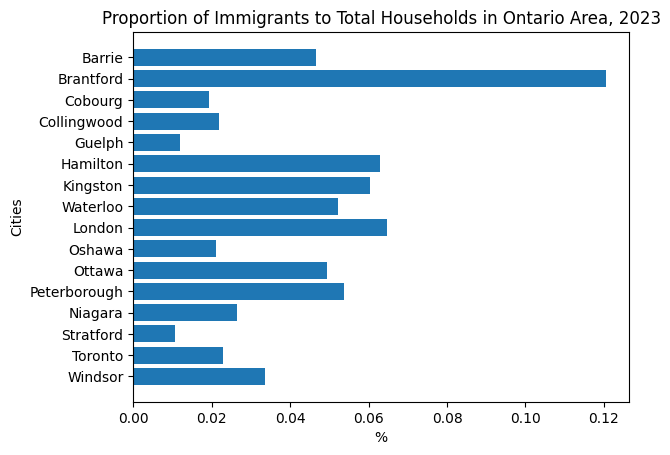

In [44]:
import matplotlib.pyplot as plt

demo_graph = pd.read_csv("demo_graph.csv")
graph = pd.concat([demo_graph["Location"], demo_graph["Proportion"]], axis = 1)

y = ["Windsor", "Toronto", "Stratford", "Niagara", "Peterborough", "Ottawa", "Oshawa", "London", "Waterloo", "Kingston", "Hamilton", "Guelph", "Collingwood", "Cobourg", "Brantford", "Barrie"]
x = list(graph["Proportion"])

plt.barh(y, x)

plt.ylabel("Cities")
plt.xlabel("%")
plt.title("Proportion of Immigrants to Total Households in Ontario Area, 2023")
plt.show()